In [1]:
import pandas as pd
df = pd.read_csv('Student_Performance.csv')

In [2]:
df.shape

(10000, 6)

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':1,'No':0})

In [7]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [8]:
import numpy as np

X = df[['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']]
y = df['Performance Index']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [11]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train,)

y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error,r2_score

print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2_score: {r2_score(y_test,y_pred)}")

MSE: 4.204157801347501
RMSE: 2.0504043019237694
R2_score: 0.9888422518546474


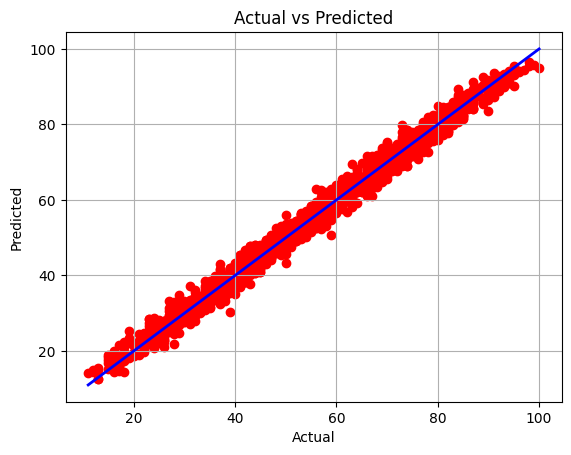

In [14]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'blue', linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted")
plt.grid()
plt.show()

In [24]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


y_pred_poly = poly_model.predict(X_test_poly)


from sklearn.metrics import mean_squared_error, r2_score
print(f"PR MSE: {mean_squared_error(y_test, y_pred_poly)}")
print(f"PR RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly))}")
print(f"PR R2_score: {r2_score(y_test, y_pred_poly)}")

PR MSE: 4.216330267869042
PR RMSE: 2.0533704653250084
PR R2_score: 0.9888099463794078


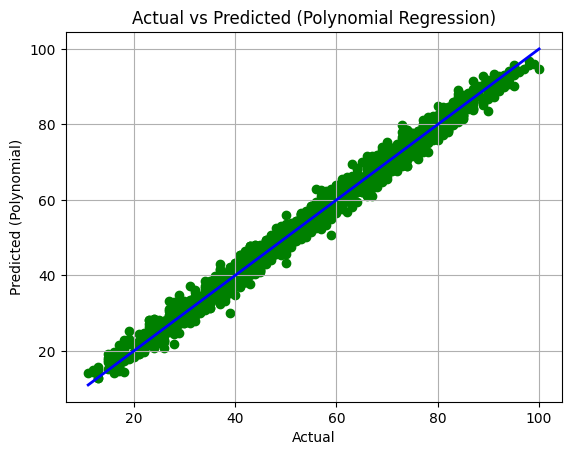

In [20]:

plt.scatter(y_test, y_pred_poly, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'blue', linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted (Polynomial)")
plt.title("Actual vs Predicted (Polynomial Regression)")
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"R2_score: {r2_score(y_test, y_pred_ridge)}\n")


Ridge Regression:
MSE: 4.204145986596328
RMSE: 2.0504014208433254
R2_score: 0.9888422832107535



In [22]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"R2_score: {r2_score(y_test, y_pred_lasso)}")

Lasso Regression:
MSE: 4.951795805970463
RMSE: 2.2252630869114025
R2_score: 0.9868580360012835


In [23]:
results = {
    "Model": ["Linear", "Polynomial", "Ridge", "Lasso"],
    "MSE": [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_poly)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    ],
    "R2": [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ]
}

compare_df = pd.DataFrame(results)
print(compare_df)

        Model       MSE      RMSE        R2
0      Linear  4.204158  2.050404  0.988842
1  Polynomial  4.216330  2.053370  0.988810
2       Ridge  4.204146  2.050401  0.988842
3       Lasso  4.951796  2.225263  0.986858
